In [1]:
import scipy.io as sio
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

Using TensorFlow backend.


In [2]:
#loading data
DDataFile = 'E:\\MEng_Project\\Keras_Data_1\\D_VLOS_scaled_mean_mean_alpha6_fft_abs_Frobenius_sphericalWave_B32_U20000.mat'
DData = sio.loadmat(DDataFile)

LocationDataFile = 'E:\\MEng_Project\\Keras_Data_1\\randLocationU20000VIP.mat'
locationData = sio.loadmat(LocationDataFile)

In [3]:
#preprocessing the data
D_data = DData['D']
location_data = locationData['location']
location_data = location_data[:2,:]

l, total = D_data.shape
d, total = location_data.shape

train_length = int(np.floor(total * 0.8))

impulses_train = np.transpose(D_data[:, :train_length])
location_train = np.transpose(location_data[:,:train_length])

impulses_test = np.transpose(D_data[:, train_length:])
location_test = np.transpose(location_data[:,train_length:])

In [15]:
#Build the model
model = keras.Sequential()

keras.layers.normalization.BatchNormalization()#epsilon=1e-06, mode=0, momentum=0.9, weights=None)
model.add(Dropout(0.2)) # best 0.2
model.add(Dense(2048, activation = 'relu'))  #tanh(343,1794)   relu (680,1600)   #the hidden layer number 

keras.layers.normalization.BatchNormalization()
model.add(Dropout(0.2)) # best 0.2
model.add(Dense(2048, activation = 'relu'))  #tanh(343,1794)   relu (680,1600)   #the hidden layer number 

keras.layers.normalization.BatchNormalization()
model.add(Dropout(0.2)) # best 0.2
model.add(Dense(2048, activation = 'relu'))  #tanh(343,1794)   relu (680,1600)   #the hidden layer number 

model.add(Dense(d, activation = 'linear'))  # None is different from 'linear'      ### the output layer

In [16]:
#Compilation
loss_func = 'mean_squared_error'   #   categorical_crossentropy   mean_squared_error
opt_func = keras.optimizers.Adam(lr=0.01) #'Adam'   #  RMSprop sgd  Adadelta   Adam

model.compile(loss = loss_func, 
              optimizer = opt_func,
              matrics=['mae']
             )
#matrics=['mae']

#best set: categorical_crossentropy  and sgd, but the loss and acc do not change....

In [17]:
#Train the model, iterating
history = model.fit(impulses_train, location_train,
                    batch_size = 20, #200
                    epochs = 100,#50
                    verbose = 2,
                    validation_split = 0.2,
                    #validation_data=(impulses_test, location_test)
                   )

Train on 12800 samples, validate on 3200 samples
Epoch 1/100
 - 31s - loss: 7308.0857 - val_loss: 2990.2190
Epoch 2/100
 - 30s - loss: 3574.5969 - val_loss: 2433.9395
Epoch 3/100
 - 30s - loss: 3019.3114 - val_loss: 1911.1752
Epoch 4/100
 - 30s - loss: 2761.6064 - val_loss: 3516.1189
Epoch 5/100
 - 30s - loss: 2684.1800 - val_loss: 2104.3592
Epoch 6/100
 - 30s - loss: 2515.5519 - val_loss: 1857.9882
Epoch 7/100
 - 30s - loss: 2422.9045 - val_loss: 1881.0174
Epoch 8/100
 - 31s - loss: 2274.4848 - val_loss: 1674.8136
Epoch 9/100
 - 29s - loss: 2301.7630 - val_loss: 1859.8149
Epoch 10/100
 - 31s - loss: 2212.6124 - val_loss: 1818.9539
Epoch 11/100
 - 31s - loss: 2051.5639 - val_loss: 1619.1946
Epoch 12/100
 - 31s - loss: 2087.7239 - val_loss: 1661.4422
Epoch 13/100
 - 31s - loss: 2111.1349 - val_loss: 2006.4148
Epoch 14/100
 - 31s - loss: 2024.7605 - val_loss: 1585.8805
Epoch 15/100
 - 31s - loss: 1995.6561 - val_loss: 1825.5139
Epoch 16/100
 - 30s - loss: 1996.3756 - val_loss: 1585.9391


In [7]:
#make prediction
loc_prediction = model.predict(impulses_test)
print(loc_prediction.shape)
print(location_test.shape)

(4000, 2)
(4000, 2)


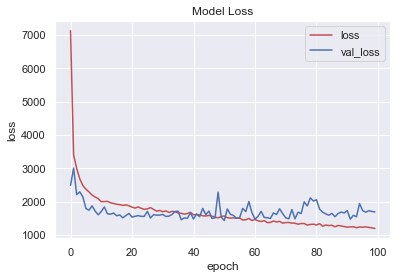

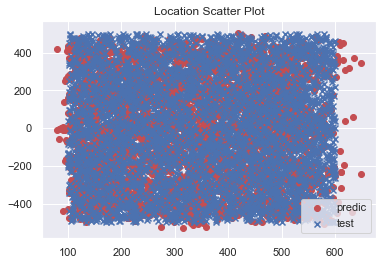

In [8]:
#plot the loss data
plt.plot(history.history['loss'],'r',label = 'loss')
plt.plot(history.history['val_loss'],'b', label = 'val_loss')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Location Scatter Plot')
ax1.scatter(loc_prediction[:,0],loc_prediction[:,1],c = 'r',marker = 'o', label = 'predic')
ax1.scatter(location_test[:,0],location_test[:,1],c = 'b',marker = 'x', label = 'test')
plt.legend()
plt.show()

In [9]:
#The training result
loss = model.evaluate(impulses_test, location_test, verbose=1)
print ('Test loss: ', loss)
#loss, acc = model.evaluate(impulses_test, location_test, verbose=0)
#print ('Test accuracy', acc)

4000/4000 [==============================] - 1s 222us/step
Test loss:  1734.690494140625


The average of mean error distance 47.08600795209361


Text(0, 0.5, 'error')

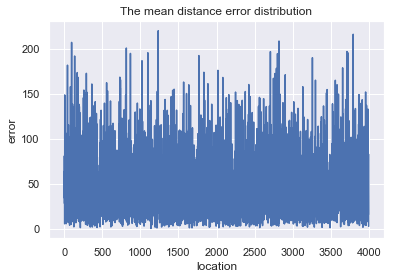

In [10]:
#calculate the mean of error distance
err = loc_prediction - location_test
x = err[:,:1]
y = err[:,1:]
err_dis = np.sqrt(np.square(x)+np.square(y))
err_avg = np.mean(err_dis)
print('The average of mean error distance', err_avg)
#set the value of x, y, z
x,y,z = location_test[:,:1],location_test[:,1:2],err_dis
z_max = np.round(max(z))
z_min = np.round(max(z))

#plot the 2D image of error 
plt.plot(err_dis)
plt.title("The mean distance error distribution")
plt.xlabel("location")
plt.ylabel("error")

Text(0.5, 0.92, 'The mean distance error of 3D Iamge')

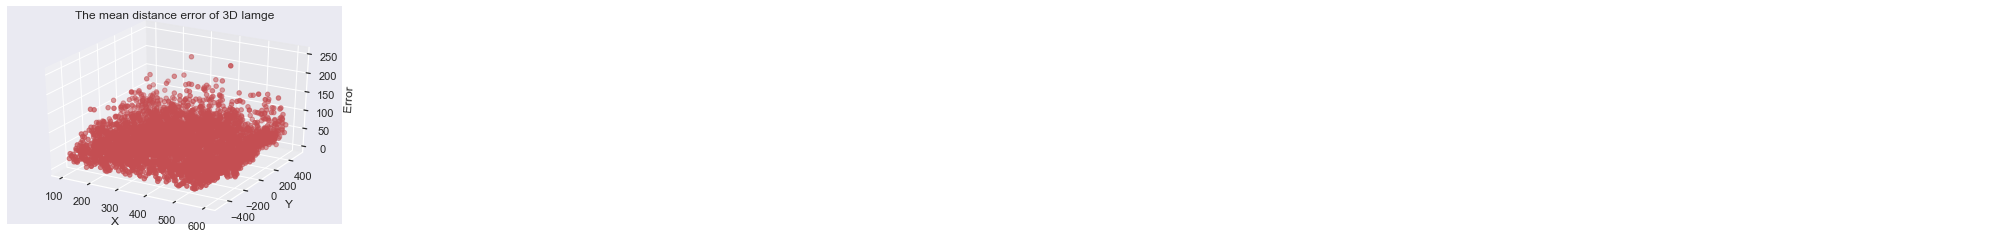

In [22]:
#plot 3D image
ax = plt.subplot(111,projection='3d')
ax.scatter(x,y,z,c='r')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Error")
plt.title("The mean distance error of 3D Iamge")

Text(0.5, 1.0, "The mean distance error of 'heat map'")

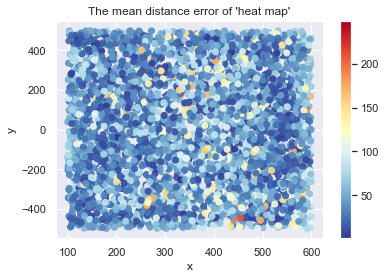

In [29]:
#draw the "heatmap" of error
fig = plt.figure()
ax3 = fig.add_subplot(111)
cm = plt.cm.get_cmap('RdYlBu_r') #Accent  RdYlBu_r RdYlBu  Blues_r  Greens  YlOrBr_r

sc = ax3.scatter(x,y,c = z, marker = 'o', label = 'test',alpha=0.9, cmap=cm)
plt.colorbar(sc)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
plt.title("The mean distance error of 'heat map'")